In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

## 1. KOSDAQ 5개년 ROE 지수 확인

In [23]:
df_kosdaq = pd.read_excel("C:\\Users\\easya\\Workspace\\HK_Project\\data\\KOSDAQROE5years.xlsx")
df_kosdaq.head()

,종목명,2017,2018,2019,2020,2021
0,엑세스바이오,-12.8,-10.4,-56.8,89.2,107.2
1,아이패밀리에스씨,-20.3,17.7,NaN,84.8,23.0
2,SGC이테크건설,11.7,13.1,6.7,79.7,33.5
3,오스템임플란트,9.3,11.5,-17.2,78.8,44.4
4,휴림로봇,9.2,-76.0,-34.7,78.8,-72.0


In [24]:
# 결측치 확인
df_kosdaq.isna().sum()

종목명      0
2017    33
2018    23
2019    11
2020     2
2021     3
dtype: int64

In [25]:
# 빈칸 nan값으로 변환 후 제거
df_kosdaq.replace('', np.nan)
df_kosdaq.dropna(inplace=True)
df_kosdaq.head()

,종목명,2017,2018,2019,2020,2021
0,엑세스바이오,-12.8,-10.4,-56.8,89.2,107.2
2,SGC이테크건설,11.7,13.1,6.7,79.7,33.5
3,오스템임플란트,9.3,11.5,-17.2,78.8,44.4
4,휴림로봇,9.2,-76.0,-34.7,78.8,-72.0
5,씨앤투스성진,-24.3,-69.6,-3.7,75.7,41.9


In [26]:
df_kosdaq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 226
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     176 non-null    object 
 1   2017    176 non-null    float64
 2   2018    176 non-null    float64
 3   2019    176 non-null    float64
 4   2020    176 non-null    float64
 5   2021    176 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.6+ KB


In [27]:
# ROE 11이상 
df_kosdaq_ROE_11_upper = df_kosdaq[(df_kosdaq[2017] >= 11) & (df_kosdaq[2018] >= 11) & (df_kosdaq[2019] >= 11) & (df_kosdaq[2020] >= 11) & (df_kosdaq[2021] >= 11)]
df_kosdaq_ROE_11_upper.head()

,종목명,2017,2018,2019,2020,2021
21,디알젬,31.7,21.0,17.9,47.0,20.7
25,노바텍,31.7,29.2,16.4,44.1,44.6
32,고려신용정보,21.1,25.6,31.8,39.8,32.3
41,에이치피오,19.4,23.9,24.7,35.6,16.5
51,에이피티씨,60.8,45.2,25.1,31.3,51.1


In [28]:
# '평균' 열 추가
df_kosdaq_ROE_11_upper["average"] = df_kosdaq_ROE_11_upper.mean(axis=1)
df_kosdaq_ROE_11_upper.head()

,종목명,2017,2018,2019,2020,2021,average
21,디알젬,31.7,21.0,17.9,47.0,20.7,27.66
25,노바텍,31.7,29.2,16.4,44.1,44.6,33.20
32,고려신용정보,21.1,25.6,31.8,39.8,32.3,30.12
41,에이치피오,19.4,23.9,24.7,35.6,16.5,24.02
51,에이피티씨,60.8,45.2,25.1,31.3,51.1,42.70


- 시각화

In [29]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list[:5]

['STIXSizeFourSym',
 'STIXSizeOneSym',
 'cmsy10',
 'DejaVu Serif Display',
 'STIXNonUnicode']

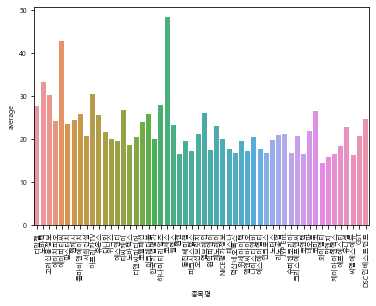

In [31]:
sns.barplot(
    data = df_kosdaq_ROE_11_upper,
    x = "종목명",
    y = "average"
)
plt.rcParams['font.family'] = 'cmsy10'
plt.rcParams['font.size'] = 7
plt.xticks(rotation=90)
plt.show()

## 2. df_code와 병합

In [33]:
df_code = pd.read_excel("C:\\Users\\easya\\Workspace\\HK_Project\\data\\KOSDAQ0305.xlsx")
df_code.head(3)

,종목명,종목코드,시가총액,매출액,현금흐름,PER,ROE,ROA,PBR,PSR,PCR,자산총계,부채총계,자본총계,주당순이익
0,셀트리온헬스케어,91990,104821,16276,-226.1,63.77,13.36,7.30,5.22,6.440219,-463.604600,37397,18068,19329,1060
1,엘앤에프,66970,71013,3561,452.7,-181.01,-9.39,-3.40,9.04,19.941870,156.865474,4662,2686,1976,-1127
2,펄어비스,263750,67281,4888,1574.3,130.26,16.45,11.43,8.68,13.764525,42.737090,8972,2603,6369,780


In [34]:
df_code = df_code[["종목명", "종목코드"]]
df_code

,종목명,종목코드
0,셀트리온헬스케어,91990
1,엘앤에프,66970
2,펄어비스,263750
3,카카오게임즈,293490
4,위메이드,112040
...,...,...
1429,제이웨이,58420
1430,신영스팩5호,323280
1431,에스디시스템,121890
1432,IBKS제12호스팩,335870


In [35]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     1434 non-null   object
 1   종목코드    1434 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.5+ KB


In [37]:
# data type 확인
df_code = df_code.astype({"종목코드":"string"})
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     1434 non-null   object
 1   종목코드    1434 non-null   string
dtypes: object(1), string(1)
memory usage: 22.5+ KB


- 종목코드 형식에 맞추어 변경 : 6자리

In [38]:
for i in range(7):
    df_code["종목코드"] = df_code["종목코드"].str.zfill(i)
df_code.head()

,종목명,종목코드
0,셀트리온헬스케어,091990
1,엘앤에프,066970
2,펄어비스,263750
3,카카오게임즈,293490
4,위메이드,112040


- df_kosdaq_ROE_11_upper 데이터 프레임과 df_code 병합

In [39]:
df_code_merge = pd.merge(df_code, df_ROE_11_upper, how='outer', on='종목명')
df_code_merge

,종목명,종목코드,2017,2018,2019,2020,2021
0,셀트리온헬스케어,091990,NaN,NaN,NaN,NaN,NaN
1,엘앤에프,066970,NaN,NaN,NaN,NaN,NaN
2,펄어비스,263750,NaN,NaN,NaN,NaN,NaN
3,카카오게임즈,293490,NaN,NaN,NaN,NaN,NaN
4,위메이드,112040,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1429,제이웨이,058420,NaN,NaN,NaN,NaN,NaN
1430,신영스팩5호,323280,NaN,NaN,NaN,NaN,NaN
1431,에스디시스템,121890,NaN,NaN,NaN,NaN,NaN
1432,IBKS제12호스팩,335870,NaN,NaN,NaN,NaN,NaN


In [42]:
# NaN 값 삭제
df_code_merge.dropna(inplace=True)
df_code_merge.head(5)

,종목명,종목코드,2017,2018,2019,2020,2021
10,리노공업,058470,18.8,19.8,18.8,17.4,30.0
17,동진쎄미켐,005290,19.7,16.9,17.8,21.6,20.8
20,JYP Ent.,035900,21.4,22.5,21.9,17.3,22.5
22,아프리카TV,067160,23.2,26.6,32.5,27.6,42.6
34,티씨케이,064760,28.8,28.4,23.2,24.7,27.7


In [41]:
df_ROE_11_upper = df_code_merge.copy()

In [ ]:
# df_ROE_11_upper.to_excel("kosdaq_ROE_11_upper.xlsx")

## 3. 산업 데이터 추출